In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
#import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from js import fetch

URL = "https://raw.githubusercontent.com/jmathree/high_school_data/main/2023_SCHOOLS_COPY.csv"
#URL = "https://raw.githubusercontent.com/jmathree/high_school_data/main/2223_AR_HIGH%20SCHOOLS.csv" #cleaned for high schools
res = await fetch(URL)
text = await res.text()

filename = '2223_SCHOOL_DATA.csv'
#filename = '2223_AR_HIGH_SCHOOLS'
with open(filename, 'w') as f:
    f.write(text)

AR_SCHOOL_DATA = pd.read_csv(filename, low_memory=False, sep=',')
#AR_HIGH_SCHOOLS = pd.read_csv(filename, low_memory=False, sep=',')
print('Dimensions of the database are ',AR_SCHOOL_DATA.shape, '.')
AR_SCHOOL_DATA.head()

Dimensions of the database are  (878, 325) .


,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,...,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI
0,101001,Dewitt Elementary School,"""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""","""K-5""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101003,Dewitt Middle School,"""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""","""6-8""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101004,Dewitt High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,21.32,19.2,21.17,19.36,19.3,19.0,19.66,19.07,18.85,19.96
3,104021,Park Avenue Elementary School,"""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""","""K-4""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104023,Meekins Middle School,"""5-7""","""5-8""","""5-7""","""5-6""","""5-6""","""5-6""","""5-6""","""5-6""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Limit to High Schools and Remove Outliers and Special Cases</h1>

In [3]:
SMALL_SCHOOLS = AR_SCHOOL_DATA[(AR_SCHOOL_DATA['2223_NUM_GRADUATES'] < 15)]
AR_HIGH_SCHOOLS = AR_SCHOOL_DATA[(AR_SCHOOL_DATA['2223_NUM_GRADUATES'] > 14)]
HIGH_ACT = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2223_ACT_COMP'] > 24.9999)]
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2223_ACT_COMP'] < 25)]
LOW_SPED = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2223_SPED'] < 0.02)]
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['2223_SPED'] > 0.001)]
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.drop(AR_HIGH_SCHOOLS.index[230:])
AR_HIGH_SCHOOLS.reset_index(inplace=True)
print('Dimensions of the database are ',AR_HIGH_SCHOOLS.shape, '.')
AR_HIGH_SCHOOLS.tail(20)

Dimensions of the database are  (230, 326) .


,index,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,...,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI
210,793,7203020,Fayetteville High School East,"""K-1""2","""9-12""","""K-1""2","""9-12""","""9-12""","""9-12""","""9-12""",...,23.85,23.82,24.13,22.33,23.52,23.05,23.72,23.94,22.72,23.38
211,800,7204028,Greenland High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,23.24,21.70,20.80,20.02,18.67,18.62,20.63,18.81,18.07,19.62
212,804,7205706,Lincoln New Tech High School,"""8-12""","""8-12""","""8-12""","""8-12""","""8-12""","""8-12""","""9-12""",...,20.66,19.87,18.32,18.62,19.12,19.01,19.07,19.09,19.36,19.75
213,813,7207049,Springdale High School,"""1-12""","""K-1""2","""10-12""","""10-12""","""10-12""","""10-12""","""10-12""",...,21.65,20.35,20.60,18.92,18.32,18.66,18.46,18.33,17.68,18.57
214,825,7207062,Har-Ber High School,"""K-1""2","""10-12""","""10-12""","""10-12""","""10-12""","""10-12""","""10-12""",...,23.58,22.52,22.56,20.71,20.43,20.94,20.28,20.52,20.64,20.58
215,835,7208062,West Fork High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,21.36,21.11,22.47,20.03,19.80,18.46,20.10,18.50,19.37,18.34
216,838,7301003,Bald Knob High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,20.41,20.97,20.16,19.90,18.69,19.10,19.41,18.51,18.85,19.53
217,842,7302010,Beebe High School,"""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""","""9-12""",...,23.43,21.07,21.72,21.25,21.23,21.39,19.90,20.67,19.91,19.91
218,846,7303015,Bradford High School,"""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""",...,20.29,21.28,21.40,18.69,17.90,19.76,18.71,17.83,17.69,17.83
219,848,7304019,White Co. Central High School,"""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""","""7-12""",...,20.71,19.08,18.16,20.73,19.39,17.49,17.67,18.83,17.42,18.88


<h1>Convert String Variables to Numeric</h1>

In [4]:
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"K-1"2',13)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"9-12"',4)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"10-12"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"6-12"',7)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"8-12"',5)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"7-12"',6)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"5-12"',8)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"K-12"',13)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"1-12"',12)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"8-10"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"7-10"',4)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"9-11"',3)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"2-12"',11)
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.replace('"3-12"',10)
#AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.drop(columns='index')
AR_HIGH_SCHOOLS['2223_GRADES'].value_counts()

6    96
4    94
3    28
5     5
7     5
8     2
Name: 2223_GRADES, dtype: int64

In [5]:
AR_HIGH_SCHOOLS = AR_HIGH_SCHOOLS.iloc[:,1:]
AR_HIGH_SCHOOLS.head()

,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,...,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI
0,101004,Dewitt High School,4,4,4,4,4,4,4,4,...,21.32,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85,19.96
1,104025,Stuttgart High School,4,5,6,4,4,4,4,4,...,20.89,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95,17.99
2,201006,Crossett High School,4,4,4,4,4,4,4,4,...,19.17,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98,18.48
3,203018,Hamburg High School,4,4,4,4,4,4,4,4,...,21.76,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84,18.02
4,302007,Cotter High School,6,6,6,6,6,6,6,6,...,21.58,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11,18.60


In [ ]:
AR_HIGH_SCHOOLS.to_csv('2223_AR_HIGH SCHOOLS.csv')
AR_HIGH_SCHOOLS.dtypes

<h1>Drop LEA and School Name; Fill Null Values with 0</h1>

In [6]:
HS_NUM_ARRAY = AR_HIGH_SCHOOLS.iloc[:,2:]
HS_NUM_ARRAY = HS_NUM_ARRAY.fillna(0)
print('Number of null values in HS_NUM_ARRAY: ', HS_NUM_ARRAY.isnull().values.sum())
HS_NUM_ARRAY.shape

Number of null values in HS_NUM_ARRAY:  0


(230, 323)

In [7]:
HS_NUM_ARRAY.head()

,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,2122_GRADES,2223_GRADES,...,1314_ACT_SCI,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI
0,4,4,4,4,4,4,4,4,4,4,...,21.32,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85,19.96
1,4,5,6,4,4,4,4,4,4,4,...,20.89,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95,17.99
2,4,4,4,4,4,4,4,4,4,4,...,19.17,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98,18.48
3,4,4,4,4,4,4,4,4,4,4,...,21.76,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84,18.02
4,6,6,6,6,6,6,6,6,6,6,...,21.58,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11,18.60


<h1>Drop ACT Scores from Dataframe for K-Means Clustering Model</h1>

In [8]:
CLUSTER_ARRAY = HS_NUM_ARRAY.iloc[:,7:273]
CLUSTER_ARRAY.head()

,2021_GRADES,2122_GRADES,2223_GRADES,2324_GRADES,1314_ENROLLMENT,1415_ENROLLMENT,1516_ENROLLMENT,1617_ENROLLMENT,1718_ENROLLMENT,1819_ENROLLMENT,...,1314_ACT_NUM_TESTED_12,1415_ACT_NUM_TESTED_12,1516_ACT_NUM_TESTED_12,1617_ACT_NUM_TESTED_12,1718_ACT_NUM_TESTED_12,1819_ACT_NUM_TESTED_12,1920_ACT_NUM_TESTED_12,2021_ACT_NUM_TESTED_12,2122_ACT_NUM_TESTED_12,2223_ACT_NUM_TESTED_12
0,4,4,4,4,403,390,393,409,379,359,...,50.0,65.0,52.0,75.0,92.0,76.0,76.0,67.0,68.0,73.0
1,4,4,4,4,531,510,475,475,456,465,...,73.0,82.0,83.0,108.0,94.0,92.0,110.0,107.0,102.0,82.0
2,4,4,4,4,528,529,512,510,500,502,...,84.0,98.0,99.0,120.0,110.0,98.0,111.0,110.0,92.0,83.0
3,4,4,4,4,552,595,573,579,575,537,...,85.0,99.0,93.0,120.0,124.0,113.0,141.0,126.0,97.0,102.0
4,6,6,6,6,296,293,284,280,299,331,...,26.0,26.0,33.0,36.0,45.0,38.0,34.0,42.0,38.0,40.0


<h1>Replace "RV", Restricted Values with Column Means</h1>

In [9]:
CLUSTER_ARRAY = CLUSTER_ARRAY.replace('"K-1"2',13)
for i in range(0,266):
    CLUSTER_ARRAY.iloc[:,i] = CLUSTER_ARRAY.iloc[:,i].replace('RV', 
    np.mean(pd.to_numeric(CLUSTER_ARRAY.iloc[:,i], errors='coerce')))
    CLUSTER_ARRAY.iloc[:,i] = pd.to_numeric(CLUSTER_ARRAY.iloc[:,i])
CLUSTER_ARRAY.head()

<ipython-input-9-78899c9ec69e>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  CLUSTER_ARRAY.iloc[:,i] = pd.to_numeric(CLUSTER_ARRAY.iloc[:,i])


,2021_GRADES,2122_GRADES,2223_GRADES,2324_GRADES,1314_ENROLLMENT,1415_ENROLLMENT,1516_ENROLLMENT,1617_ENROLLMENT,1718_ENROLLMENT,1819_ENROLLMENT,...,1314_ACT_NUM_TESTED_12,1415_ACT_NUM_TESTED_12,1516_ACT_NUM_TESTED_12,1617_ACT_NUM_TESTED_12,1718_ACT_NUM_TESTED_12,1819_ACT_NUM_TESTED_12,1920_ACT_NUM_TESTED_12,2021_ACT_NUM_TESTED_12,2122_ACT_NUM_TESTED_12,2223_ACT_NUM_TESTED_12
0,4,4,4,4,403,390,393,409,379,359,...,50.0,65.0,52.0,75.0,92.0,76.0,76.0,67.0,68.0,73.0
1,4,4,4,4,531,510,475,475,456,465,...,73.0,82.0,83.0,108.0,94.0,92.0,110.0,107.0,102.0,82.0
2,4,4,4,4,528,529,512,510,500,502,...,84.0,98.0,99.0,120.0,110.0,98.0,111.0,110.0,92.0,83.0
3,4,4,4,4,552,595,573,579,575,537,...,85.0,99.0,93.0,120.0,124.0,113.0,141.0,126.0,97.0,102.0
4,6,6,6,6,296,293,284,280,299,331,...,26.0,26.0,33.0,36.0,45.0,38.0,34.0,42.0,38.0,40.0


<h1>Build K-Means Clustering Model</h1>

In [10]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
X = CLUSTER_ARRAY.values[:,0:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.71272839, -0.70851785, -0.69301887, ..., -0.30126565,
        -0.25240872, -0.21478076],
       [-0.71272839, -0.70851785, -0.69301887, ...,  0.05113664,
         0.05243085, -0.13720334],
       [-0.71272839, -0.70851785, -0.69301887, ...,  0.07756681,
        -0.03722785, -0.12858363],
       ...,
       [-0.71272839, -0.70851785, -0.69301887, ..., -0.08982428,
        -0.09102307, -0.23202019],
       [ 0.94310524,  0.93753372,  0.96733884, ..., -0.68009812,
        -0.66483872, -0.7061044 ],
       [ 2.59893887,  2.58358529,  2.62769656, ..., -0.54794726,
        -0.62897524, -0.507851  ]])

In [11]:
clusters = [3,4,5,6]
for i in clusters:
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the KMeans model
    km.fit_predict(X)
    # Calculate Silhoutte Score
    score = silhouette_score(X, km.labels_, metric='euclidean')
    # Print the score
    print('Silhouette Score for ', i, ' clusters is ',score, '.')

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Silhouette Score for  3  clusters is  0.6898623432695348 .
Silhouette Score for  4  clusters is  0.5014707503963783 .
Silhouette Score for  5  clusters is  0.5167379405049191 .
Silhouette Score for  6  clusters is  0.4953224219444321 .


In [13]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
AR_HIGH_SCHOOLS['PRED_CLUSTERS'] = labels
HS_NUM_ARRAY['PRED_CLUSTERS'] = labels
CLUSTER_ARRAY['PRED_CLUSTERS'] = labels
print(AR_HIGH_SCHOOLS['PRED_CLUSTERS'].value_counts())
AR_HIGH_SCHOOLS.head()

[0 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 1 2 0 0 0 2 0 0 0
 0 0 0 0 0 2 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 2 2 0 0 0 0 0 0 0 0 0
 0 0 2 1 0 0 0 1 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 1 1 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 0]
0    192
2     26
1     12
Name: PRED_CLUSTERS, dtype: int64


,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,...,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI,PRED_CLUSTERS
0,101004,Dewitt High School,4,4,4,4,4,4,4,4,...,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85,19.96,0
1,104025,Stuttgart High School,4,5,6,4,4,4,4,4,...,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95,17.99,0
2,201006,Crossett High School,4,4,4,4,4,4,4,4,...,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98,18.48,0
3,203018,Hamburg High School,4,4,4,4,4,4,4,4,...,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84,18.02,0
4,302007,Cotter High School,6,6,6,6,6,6,6,6,...,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11,18.60,0


<h1>Add Cluster Labels to Data Frames</h1>

In [14]:
AR_HIGH_SCHOOLS['PRED_CLUSTERS'] = labels
HS_NUM_ARRAY['PRED_CLUSTERS'] = labels
CLUSTER_ARRAY['PRED_CLUSTERS'] = labels
print(AR_HIGH_SCHOOLS['PRED_CLUSTERS'].value_counts())
AR_HIGH_SCHOOLS.head()

0    192
2     26
1     12
Name: PRED_CLUSTERS, dtype: int64


,LEA,SCHOOL_NAME,1314_GRADES,1415_GRADES,1516_GRADES,1617_GRADES,1718_GRADES,1819_GRADES,1920_GRADES,2021_GRADES,...,1415_ACT_SCI,1516_ACT_SCI,1617_ACT_SCI,1718_ACT_SCI,1819_ACT_SCI,1920_ACT_SCI,2021_ACT_SCI,2122_ACT_SCI,2223_ACT_SCI,PRED_CLUSTERS
0,101004,Dewitt High School,4,4,4,4,4,4,4,4,...,19.20,21.17,19.36,19.30,19.00,19.66,19.07,18.85,19.96,0
1,104025,Stuttgart High School,4,5,6,4,4,4,4,4,...,20.13,20.83,19.09,19.38,18.96,18.55,18.56,17.95,17.99,0
2,201006,Crossett High School,4,4,4,4,4,4,4,4,...,18.85,20.03,19.43,18.86,18.04,17.94,17.84,17.98,18.48,0
3,203018,Hamburg High School,4,4,4,4,4,4,4,4,...,19.64,19.73,19.85,18.30,19.32,18.46,17.87,17.84,18.02,0
4,302007,Cotter High School,6,6,6,6,6,6,6,6,...,21.85,23.15,20.56,20.98,20.79,19.21,19.33,20.11,18.60,0


<h1>Create Individual Data Frames for Each Group</h1>

In [15]:
GROUP_1 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1)]
print('GROUP_1 dimensions: ',GROUP_1.shape)
GROUP_2 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2)]
print('GROUP_2 dimensions: ',GROUP_2.shape)
GROUP_3 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 0)]
print('GROUP_3 dimensions: ',GROUP_3.shape)

GROUP_1 dimensions:  (12, 326)
GROUP_2 dimensions:  (26, 326)
GROUP_3 dimensions:  (192, 326)


<h1>Create Boxplot for ACT Composite Scores for Each Group</h1>

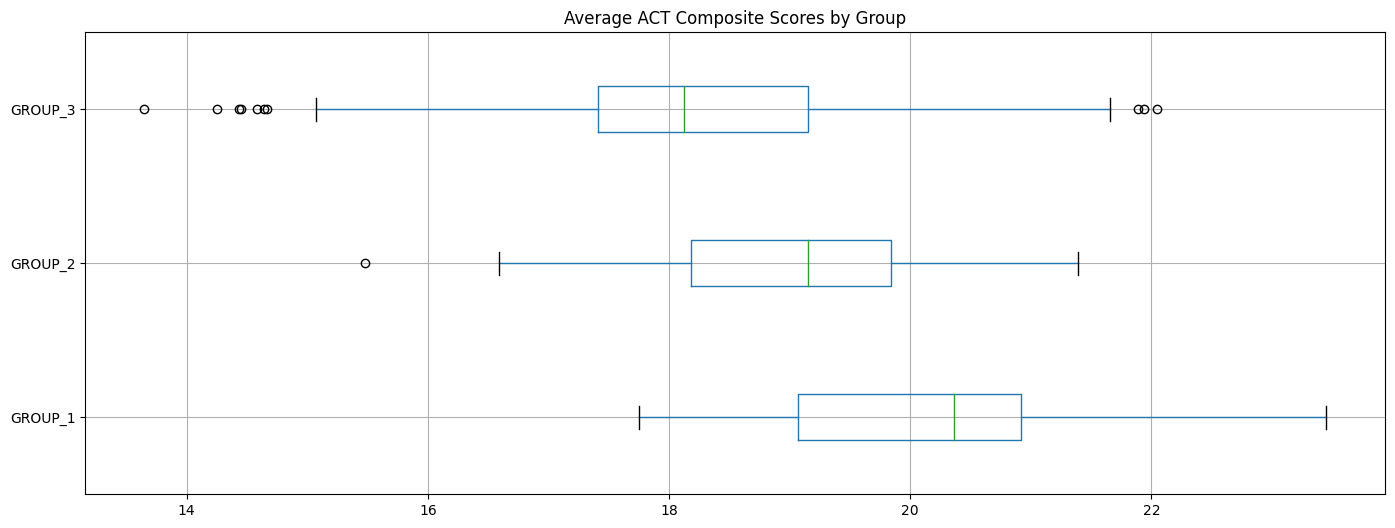

In [16]:
x = [GROUP_1['2223_ACT_COMP'],GROUP_2['2223_ACT_COMP'],GROUP_3['2223_ACT_COMP']]
df = pd.DataFrame(x, index=['GROUP_1', 'GROUP_2', 'GROUP_3'])

df.T.boxplot(vert=False, figsize=(20,6))
plt.title('Average ACT Composite Scores by Group')
plt.subplots_adjust(left=0.25)
plt.show()

<h1>Create and Plot Enrollment Ratio</h1>

In [17]:
AR_HIGH_SCHOOLS['2223_ENR_RATIO'] = AR_HIGH_SCHOOLS['2223_ENROLLMENT']/AR_HIGH_SCHOOLS['2223_GRADES']
HS_NUM_ARRAY['2223_ENR_RATIO'] = HS_NUM_ARRAY['2223_ENROLLMENT']/HS_NUM_ARRAY['2223_GRADES']
CLUSTER_ARRAY['2223_ENR_RATIO'] = CLUSTER_ARRAY['2223_ENROLLMENT']/CLUSTER_ARRAY['2223_GRADES']
GROUP_1['2223_ENR_RATIO'] = GROUP_1['2223_ENROLLMENT']/GROUP_1['2223_GRADES']
GROUP_3['2223_ENR_RATIO'] = GROUP_2['2223_ENROLLMENT']/GROUP_2['2223_GRADES']
GROUP_3['2223_ENR_RATIO'] = GROUP_3['2223_ENROLLMENT']/GROUP_3['2223_GRADES']


<ipython-input-17-1be0410ed0a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GROUP_1['2223_ENR_RATIO'] = GROUP_1['2223_ENROLLMENT']/GROUP_1['2223_GRADES']
<ipython-input-17-1be0410ed0a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GROUP_3['2223_ENR_RATIO'] = GROUP_2['2223_ENROLLMENT']/GROUP_2['2223_GRADES']
<ipython-input-17-1be0410ed0a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

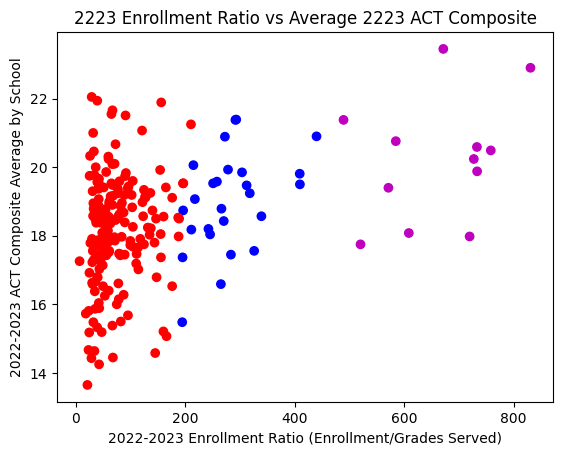

In [18]:
#Enrollment Ratio vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_ENR_RATIO']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Enrollment Ratio vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 Enrollment Ratio (Enrollment/Grades Served)")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Free-Reduced Plot</h1>

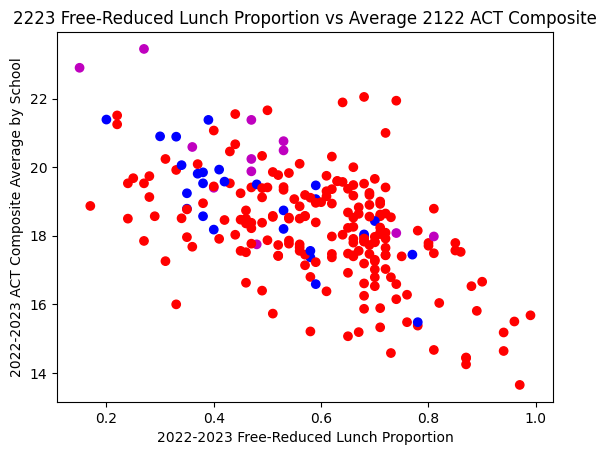

In [19]:
#grades served vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_FREE_REDUCED']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Free-Reduced Lunch Proportion vs Average 2122 ACT Composite')
plt.xlabel("2022-2023 Free-Reduced Lunch Proportion")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Plot Grades Served</h1>

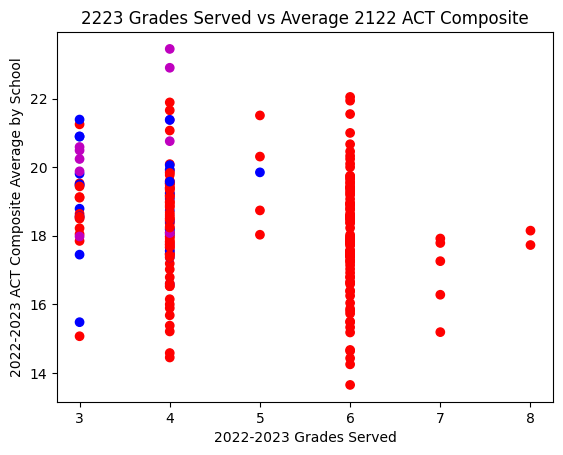

In [20]:
#grades served vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_GRADES']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Grades Served vs Average 2122 ACT Composite')
plt.xlabel("2022-2023 Grades Served")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Plot Proportion of Student Body that is Black</h1>

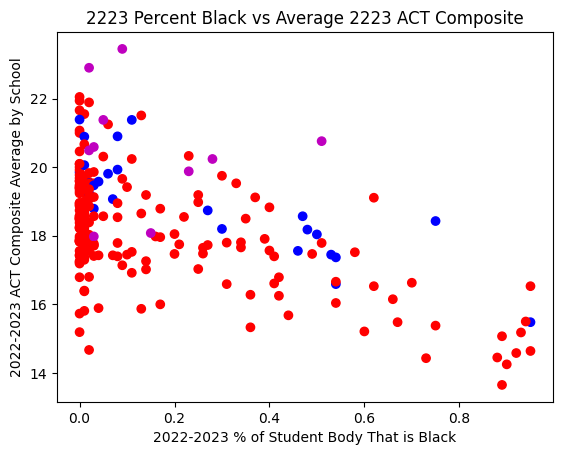

In [21]:
# % Black vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_POP_BLACK']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Percent Black vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 % of Student Body That is Black")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Plot of Proportion of Student Body that is Hispanic</h1>

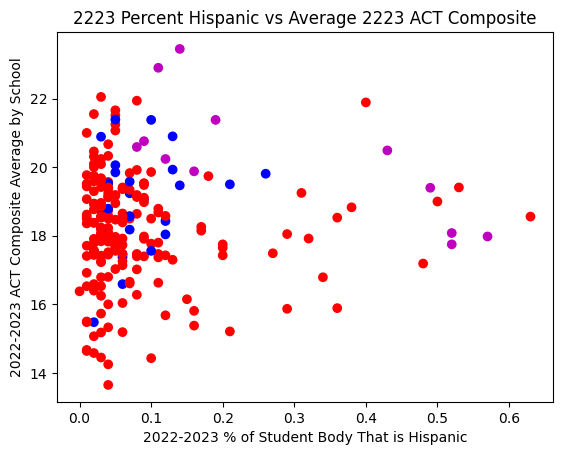

In [22]:
# % Hispanic vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_POP_HISP']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Percent Hispanic vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 % of Student Body That is Hispanic")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Plot of Student Body Proportion that is White</h1>

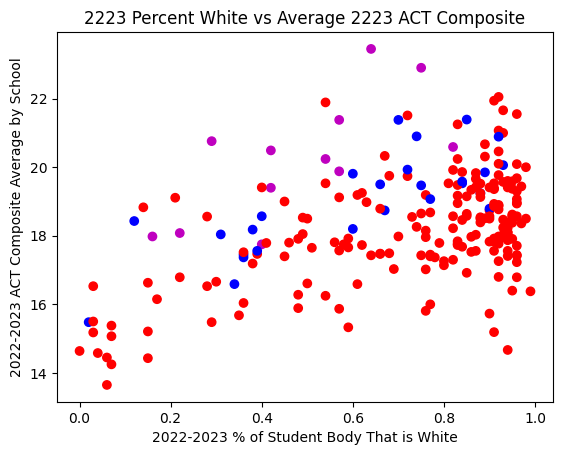

In [23]:
# % White vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_POP_WHITE']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Percent White vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 % of Student Body That is White")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Body with a 504 Plan</h1>

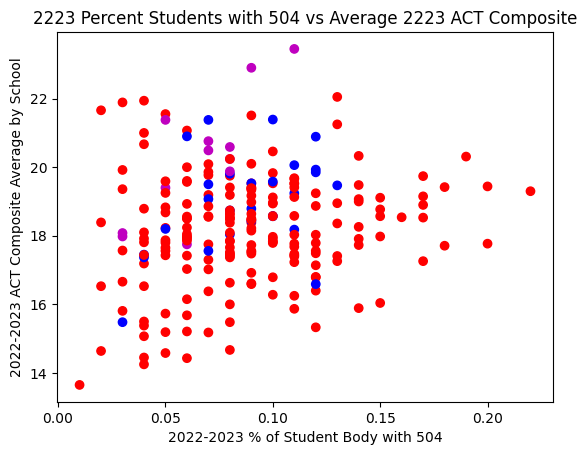

In [24]:
# % 504 vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_504']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Percent Students with 504 vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 % of Student Body with 504")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Proportion of Student Body Receiving Special Education Services</h1>

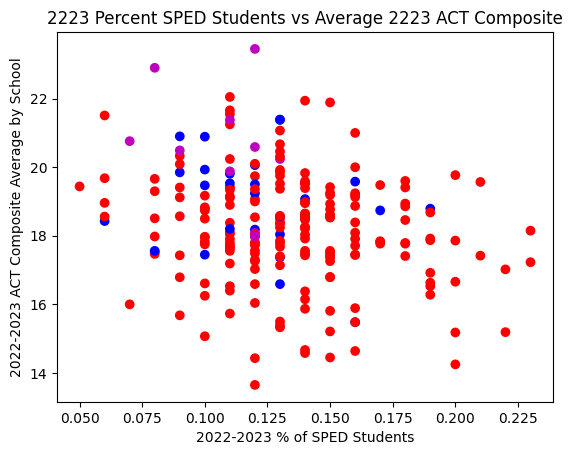

In [25]:
# % SPED vs ACT Composite
x = AR_HIGH_SCHOOLS['2223_SPED']
y = AR_HIGH_SCHOOLS['2223_ACT_COMP']
col = np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1,'m',np.where(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('2223 Percent SPED Students vs Average 2223 ACT Composite')
plt.xlabel("2022-2023 % of SPED Students")
plt.ylabel("2022-2023 ACT Composite Average by School")
plt.show()

<h1>Build Regression Model</h1>

In [26]:
LR_INPUT = AR_HIGH_SCHOOLS[['2223_GRADES','2223_ENR_RATIO','2223_FREE_REDUCED','2223_POP_BLACK','2223_POP_WHITE', '2223_SPED', '2223_504']]

#LR_INPUT = AR_HIGH_SCHOOLS[['2223_GRADES','2223_ENR_RATIO','2223_FREE_REDUCED','2223_POP_BLACK','2223_POP_WHITE', '2223_POP_HISP', '2223_SPED', '2223_DYSLEXIA_PROP','2223_504','2223_NUM_GRADUATES','2223_AP_PROP']]
LR_INPUT = LR_INPUT.fillna(0)
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(LR_INPUT)
y = np.asanyarray(AR_HIGH_SCHOOLS['2223_ACT_COMP'])
regr.fit(x, y)
c = pd.DataFrame(zip(LR_INPUT.columns, regr.coef_))
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)
c

Coefficients:  [-4.80478766e-02  3.24182454e-03 -2.43104919e+00 -1.70794847e+00
  1.46389614e+00 -5.76943328e+00 -1.14881116e+00]
Intercept:  19.678151779235137


,0,1
0,2223_GRADES,-0.048048
1,2223_ENR_RATIO,0.003242
2,2223_FREE_REDUCED,-2.431049
3,2223_POP_BLACK,-1.707948
4,2223_POP_WHITE,1.463896
5,2223_SPED,-5.769433
6,2223_504,-1.148811


In [27]:
c = c.rename(columns={0:'VAR_NAME',1:'Coef_n'})
c['X_n'] = c['VAR_NAME']
new_row = pd.DataFrame({'VAR_NAME':'INTERCEPT', 'Coef_n':19.678152, 'X_n':'X_0'}, index=[0])
cc = pd.concat([new_row,c.loc[:]]).reset_index(drop=True)
c = cc
for i in range(0,7):
    c.iloc[i+1,2] = 'X_' + str(i+1)

y_hat= regr.predict(LR_INPUT)
x = np.asanyarray(LR_INPUT)
y = np.asanyarray(AR_HIGH_SCHOOLS['2223_ACT_COMP'])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('R^2: %.2f' % regr.score(x, y))
c = c.iloc[:,0:3]
c.head(8)

/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Residual sum of squares: 1.28
R^2: 0.53


,VAR_NAME,Coef_n,X_n
0,INTERCEPT,19.678152,X_0
1,2223_GRADES,-0.048048,X_1
2,2223_ENR_RATIO,0.003242,X_2
3,2223_FREE_REDUCED,-2.431049,X_3
4,2223_POP_BLACK,-1.707948,X_4
5,2223_POP_WHITE,1.463896,X_5
6,2223_SPED,-5.769433,X_6
7,2223_504,-1.148811,X_7


<h1>Calculate Residuals and Add to Dataframes</h1>

In [28]:
AR_HIGH_SCHOOLS['2223_PREDICTION'] = pd.DataFrame(y_hat)
HS_NUM_ARRAY['2223_PREDICTION'] = pd.DataFrame(y_hat)
CLUSTER_ARRAY['2223_PREDICTION'] = pd.DataFrame(y_hat)
AR_HIGH_SCHOOLS['2223_RESIDUALS'] = AR_HIGH_SCHOOLS['2223_ACT_COMP'] - AR_HIGH_SCHOOLS['2223_PREDICTION']
HS_NUM_ARRAY['2223_RESIDUALS'] = AR_HIGH_SCHOOLS['2223_RESIDUALS']
CLUSTER_ARRAY['2223_RESIDUALS'] = AR_HIGH_SCHOOLS['2223_RESIDUALS']
GROUP_1 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 1)]
GROUP_2 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 2)]
GROUP_3 = AR_HIGH_SCHOOLS[(AR_HIGH_SCHOOLS['PRED_CLUSTERS'] == 0)]

In [32]:
RANKED_2223 = AR_HIGH_SCHOOLS[['LEA','SCHOOL_NAME','2223_RESIDUALS','2223_ACT_COMP','2223_GRADES','2223_ENR_RATIO','2223_POP_BLACK','2223_POP_WHITE', '2223_SPED', '2223_504', '2223_FREE_REDUCED','PRED_CLUSTERS']]

#RANKED_2223 = AR_HIGH_SCHOOLS[['LEA','SCHOOL_NAME','2223_RESIDUALS','2223_ACT_COMP','2223_AP_PROP','2223_GRADES','2223_ENR_RATIO','2223_POP_BLACK','2223_POP_WHITE', '2223_SPED', '2223_504', '2223_FREE_REDUCED','PRED_CLUSTERS']]
RANKED_2223 = RANKED_2223.sort_values(by=['2223_RESIDUALS','2223_ACT_COMP'], ascending=False)
RANKED_2223.reset_index(inplace=True)
RANKED_2223.head()

,index,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,2223_GRADES,2223_ENR_RATIO,2223_POP_BLACK,2223_POP_WHITE,2223_SPED,2223_504,2223_FREE_REDUCED,PRED_CLUSTERS
0,95,3102002,Dierks High School,3.743668,21.94,6,39.166667,0.00,0.91,0.14,0.04,0.74,0
1,17,504023,Omaha High School,3.656435,22.05,6,29.000000,0.00,0.92,0.11,0.13,0.68,0
2,227,7504011,Dardanelle High School,3.597721,21.89,4,156.000000,0.02,0.54,0.15,0.03,0.64,0
3,19,506032,Lead Hill High School,2.865471,21.00,6,31.666667,0.00,0.93,0.16,0.04,0.72,0
4,210,7203020,Fayetteville High School East,2.479871,23.45,4,671.250000,0.09,0.64,0.12,0.11,0.27,1


In [34]:
RANKED_2223 = RANKED_2223.iloc[:,1:]
#RANKED_2223.to_csv('2223_RANKED_FINAL.csv')
RANKED_2223.head()

,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,2223_GRADES,2223_ENR_RATIO,2223_POP_BLACK,2223_POP_WHITE,2223_SPED,2223_504,2223_FREE_REDUCED,PRED_CLUSTERS
0,3102002,Dierks High School,3.743668,21.94,6,39.166667,0.00,0.91,0.14,0.04,0.74,0
1,504023,Omaha High School,3.656435,22.05,6,29.000000,0.00,0.92,0.11,0.13,0.68,0
2,7504011,Dardanelle High School,3.597721,21.89,4,156.000000,0.02,0.54,0.15,0.03,0.64,0
3,506032,Lead Hill High School,2.865471,21.00,6,31.666667,0.00,0.93,0.16,0.04,0.72,0
4,7203020,Fayetteville High School East,2.479871,23.45,4,671.250000,0.09,0.64,0.12,0.11,0.27,1


In [36]:
RANKED_2223['2223_RANK'] = RANKED_2223['2223_GRADES']
for i in range(0,230):
    RANKED_2223['2223_RANK'][i] = i + 1
SHOW_RANK_2223 = RANKED_2223[['2223_RANK', 'LEA','SCHOOL_NAME','2223_RESIDUALS','2223_ACT_COMP','PRED_CLUSTERS']]
SHOW_RANK_2223.head()

<ipython-input-36-84f87943a0d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RANKED_2223['2223_RANK'][i] = i + 1


,2223_RANK,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
0,1,3102002,Dierks High School,3.743668,21.94,0
1,2,504023,Omaha High School,3.656435,22.05,0
2,3,7504011,Dardanelle High School,3.597721,21.89,0
3,4,506032,Lead Hill High School,2.865471,21.00,0
4,5,7203020,Fayetteville High School East,2.479871,23.45,1


In [37]:
SHOW_RANK_2223['2223_RESIDUALS'] = SHOW_RANK_2223['2223_RESIDUALS'].round(4)
SHOW_RANK_2223.describe()

<ipython-input-37-9707d0f1941b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SHOW_RANK_2223['2223_RESIDUALS'] = SHOW_RANK_2223['2223_RESIDUALS'].round(4)


,2223_RANK,LEA,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
count,230.000000,2.300000e+02,230.000000,230.000000,230.000000
mean,115.500000,3.902563e+06,0.000002,18.330826,0.278261
std,66.539462,2.262590e+06,1.136047,1.654098,0.654815
min,1.000000,1.010040e+05,-3.268100,13.650000,0.000000
25%,58.250000,1.828437e+06,-0.707750,17.455000,0.000000
50%,115.500000,3.809525e+06,-0.137750,18.385000,0.000000
75%,172.750000,6.002595e+06,0.621100,19.407500,0.000000
max,230.000000,7.510019e+06,3.743700,23.450000,2.000000


In [ ]:
SHOW_RANK_2223.to_csv('2223_RANKINGS_FINAL.csv')

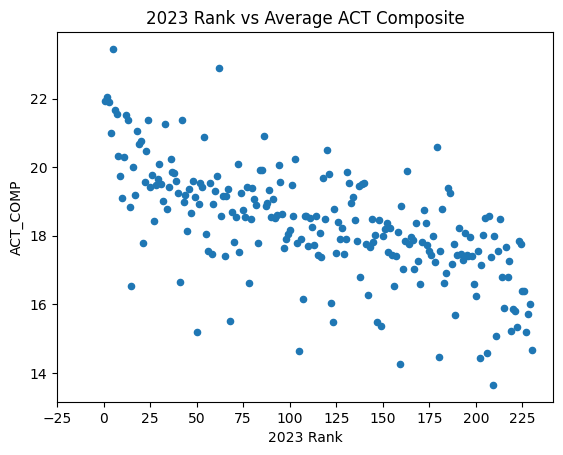

In [38]:
#RANKED_AP_2223['2223_RANK'] = SHOW_RANK_2223['2223_RANK']
#RANKED_AP_2223['2223_AP_PROP'] = SHOW_RANK_2223['2223_AP_PROP']
AX1 = SHOW_RANK_2223.plot.scatter(x = '2223_RANK', y = '2223_ACT_COMP', xlabel = '2023 Rank', ylabel = 'ACT_COMP')
AX1.xaxis.set_ticks(np.arange(-25, 250, 25))
plt.title('2023 Rank vs Average ACT Composite')
plt.show()

In [39]:
SHOW_RANK_2223.head()

,2223_RANK,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
0,1,3102002,Dierks High School,3.7437,21.94,0
1,2,504023,Omaha High School,3.6564,22.05,0
2,3,7504011,Dardanelle High School,3.5977,21.89,0
3,4,506032,Lead Hill High School,2.8655,21.00,0
4,5,7203020,Fayetteville High School East,2.4799,23.45,1


In [ ]:
HIGH_ACT['2223_ACT_COMP']

In [40]:
GROUP_1_RANKED  = SHOW_RANK_2223[(SHOW_RANK_2223['PRED_CLUSTERS'] == 1)]
GROUP_1_RANKED.head()

,2223_RANK,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
4,5,7203020,Fayetteville High School East,2.4799,23.45,1
19,20,6001001,Central High School,1.5985,20.76,1
23,24,6601025,Southside High School,1.3944,21.38,1
61,62,401003,Bentonville High School,0.5875,22.90,1
102,103,2301006,Conway High School,0.0214,20.24,1


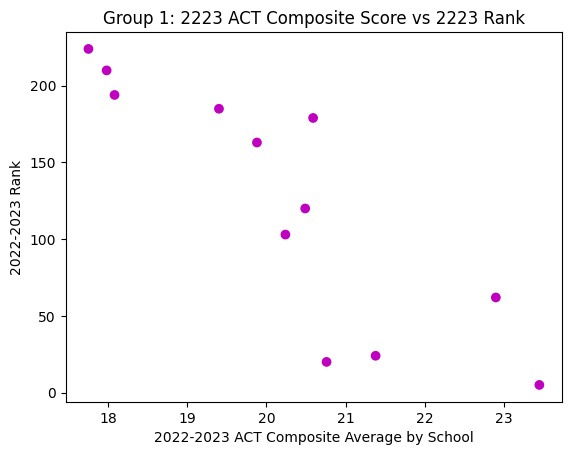

In [41]:
x = GROUP_1_RANKED['2223_ACT_COMP']
y = GROUP_1_RANKED['2223_RANK']
col = np.where(GROUP_1_RANKED['PRED_CLUSTERS'] == 1,'m',np.where(GROUP_1_RANKED['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('Group 1: 2223 ACT Composite Score vs 2223 Rank')
plt.xlabel("2022-2023 ACT Composite Average by School")
plt.ylabel("2022-2023 Rank")
plt.show()

In [42]:
GROUP_1_RANKED.describe()

,2223_RANK,LEA,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
count,12.000000,1.200000e+01,12.000000,12.000000,12.0
mean,124.083333,4.578276e+06,-0.059400,20.241667,1.0
std,79.681706,2.883095e+06,1.336384,1.807640,0.0
min,5.000000,4.010030e+05,-2.044900,17.750000,1.0
25%,52.500000,1.827018e+06,-0.869375,19.070000,1.0
50%,141.500000,6.152012e+06,-0.398300,20.365000,1.0
75%,187.250000,6.751524e+06,0.789225,20.915000,1.0
max,224.000000,7.207062e+06,2.479900,23.450000,1.0


In [44]:
GROUP_2_RANKED  = SHOW_RANK_2223[(SHOW_RANK_2223['PRED_CLUSTERS'] == 2)]
GROUP_2_RANKED.head()


,2223_RANK,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
12,13,7311052,Searcy High School,1.8907,21.38,2
26,27,6001005,Parkview Magnet High School,1.3245,18.43,2
41,42,6602043,Greenwood High School,1.0129,21.39,2
53,54,2303017,Greenbrier High School,0.6605,20.89,2
54,55,1611042,Nettleton High School,0.6542,18.04,2


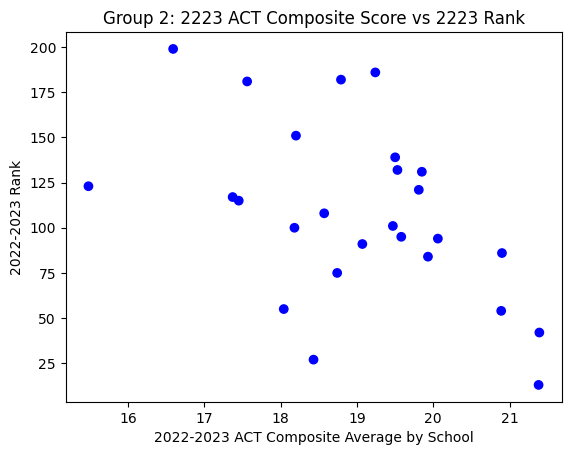

In [45]:
x = GROUP_2_RANKED['2223_ACT_COMP']
y = GROUP_2_RANKED['2223_RANK']
col = np.where(GROUP_2_RANKED['PRED_CLUSTERS'] == 1,'m',np.where(GROUP_2_RANKED['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('Group 2: 2223 ACT Composite Score vs 2223 Rank')
plt.xlabel("2022-2023 ACT Composite Average by School")
plt.ylabel("2022-2023 Rank")
plt.show()

In [46]:
GROUP_2_RANKED.describe()

,2223_RANK,LEA,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
count,26.000000,2.600000e+01,26.000000,26.000000,26.0
mean,107.769231,3.789369e+06,0.061550,19.000000,2.0
std,48.245462,2.172242e+06,0.674967,1.431969,0.0
min,13.000000,3.037030e+05,-1.008300,15.480000,2.0
25%,84.500000,2.004517e+06,-0.300400,18.185000,2.0
50%,104.500000,2.807526e+06,-0.009300,19.155000,2.0
75%,131.750000,6.002597e+06,0.330625,19.840000,2.0
max,199.000000,7.311052e+06,1.890700,21.390000,2.0


In [48]:
GROUP_3_RANKED  = SHOW_RANK_2223[(SHOW_RANK_2223['PRED_CLUSTERS'] == 0)]
GROUP_3_RANKED.head()

,2223_RANK,LEA,SCHOOL_NAME,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
0,1,3102002,Dierks High School,3.7437,21.94,0
1,2,504023,Omaha High School,3.6564,22.05,0
2,3,7504011,Dardanelle High School,3.5977,21.89,0
3,4,506032,Lead Hill High School,2.8655,21.00,0
5,6,502007,Bergman High School,2.4686,21.66,0


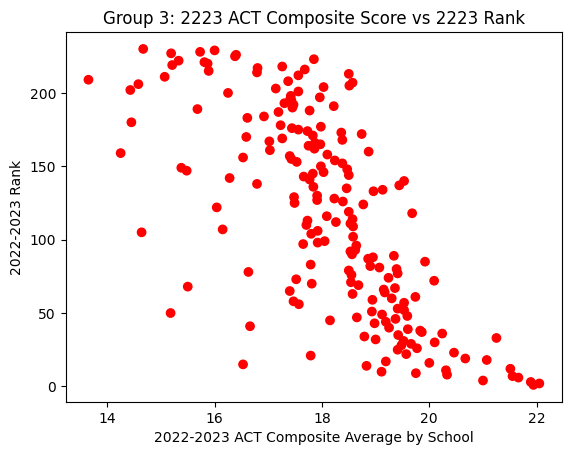

In [49]:
x = GROUP_3_RANKED['2223_ACT_COMP']
y = GROUP_3_RANKED['2223_RANK']
col = np.where(GROUP_3_RANKED['PRED_CLUSTERS'] == 1,'m',np.where(GROUP_3_RANKED['PRED_CLUSTERS'] == 2,'b','r'))
plt.scatter(x, y,  color=col)
plt.title('Group 3: 2223 ACT Composite Score vs 2223 Rank')
plt.xlabel("2022-2023 ACT Composite Average by School")
plt.ylabel("2022-2023 Rank")
plt.show()

In [50]:
GROUP_3_RANKED.describe()

,2223_RANK,LEA,2223_RESIDUALS,2223_ACT_COMP,PRED_CLUSTERS
count,192.000000,1.920000e+02,192.000000,192.000000,192.0
mean,116.010417,3.875660e+06,-0.004620,18.120781,0.0
std,68.007467,2.238375e+06,1.176490,1.577687,0.0
min,1.000000,1.010040e+05,-3.268100,13.650000,0.0
25%,56.750000,1.777510e+06,-0.722300,17.407500,0.0
50%,117.000000,3.857019e+06,-0.154200,18.125000,0.0
75%,173.250000,5.803261e+06,0.644975,19.155000,0.0
max,230.000000,7.510019e+06,3.743700,22.050000,0.0


<h1>Create Final Rankings DataFrame</h1>

In [51]:
URL = "https://raw.githubusercontent.com/jmathree/improving_Arkansas_education/main/2223_RANKINGS.csv"
#URL = "https://raw.githubusercontent.com/jmathree/high_school_data/main/2223_AR_HIGH%20SCHOOLS.csv" #cleaned for high schools
res = await fetch(URL)
text = await res.text()

filename = '2223_AR_HIGH_SCHOOL_RANKINGS.csv'
#filename = '2223_AR_HIGH_SCHOOLS'
with open(filename, 'w') as f:
    f.write(text)

FINAL_HS_RANKING_2223 = pd.read_csv(filename, low_memory=False, sep=',')
#AR_HIGH_SCHOOLS = pd.read_csv(filename, low_memory=False, sep=',')
print('Dimensions of the database are ',FINAL_HS_RANKING_2223.shape, '.')
FINAL_HS_RANKING_2223.head()

Dimensions of the database are  (231, 9) .


,2223_RANK,LEA,SCHOOL,2223_RESID,2223_ACT_COMP,2122_RANK,2122_ACT_COMP,RANK_CHG,ACT_CHG
0,1,3102002.0,Dierks High School,3.7437,21.94,43.0,19.21,42.0,2.73
1,2,504023.0,Omaha High School,3.6564,22.05,11.0,20.20,9.0,1.85
2,3,7504011.0,Dardanelle High School,3.5977,21.89,2.0,21.27,-1.0,0.62
3,4,506032.0,Lead Hill High School,2.8655,21.00,156.0,17.50,152.0,3.50
4,5,7203020.0,Fayetteville High School East,2.4799,23.45,9.0,22.97,4.0,0.48


In [52]:
FINAL_HS_RANKING_2223 = FINAL_HS_RANKING_2223.iloc[0:230,:]
FINAL_HS_RANKING_2223.shape

(230, 9)

In [53]:
RANKED_BOTH = FINAL_HS_RANKING_2223[(FINAL_HS_RANKING_2223['2122_RANK']>0)]
print('Dimensions of previously ranked database are ', RANKED_BOTH.shape,'.')

Dimensions of previously ranked database are  (227, 9) .


In [54]:
FINAL_HS_RANKING_2223.dtypes

2223_RANK          int64
LEA              float64
SCHOOL            object
2223_RESID       float64
2223_ACT_COMP    float64
2122_RANK        float64
2122_ACT_COMP    float64
RANK_CHG         float64
ACT_CHG          float64
dtype: object

In [55]:
RANKED_BOTH.describe()

,2223_RANK,LEA,2223_RESID,2223_ACT_COMP,2122_RANK,2122_ACT_COMP,RANK_CHG,ACT_CHG
count,227.000000,2.270000e+02,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000
mean,116.066079,3.888669e+06,-0.012433,18.336079,115.92511,18.423216,-0.140969,-0.087137
std,66.116551,2.254979e+06,1.128305,1.649927,67.18676,1.646378,67.281981,1.070582
min,1.000000,1.010040e+05,-3.268100,13.650000,1.00000,13.480000,-187.000000,-4.080000
25%,59.500000,1.852859e+06,-0.699200,17.460000,57.50000,17.510000,-34.000000,-0.690000
50%,116.000000,3.809023e+06,-0.146000,18.390000,116.00000,18.380000,4.000000,-0.010000
75%,172.500000,6.001003e+06,0.605400,19.405000,173.50000,19.290000,35.500000,0.525000
max,230.000000,7.510019e+06,3.743700,23.450000,232.00000,22.970000,191.000000,3.500000


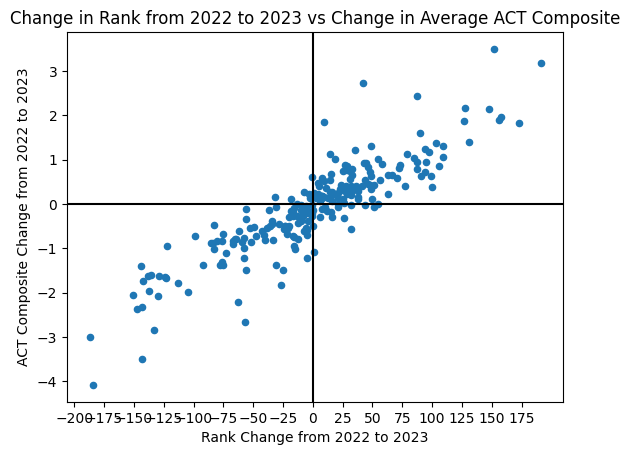

In [56]:
#plot ACT_COMP_CHG vs RANK_CHG
AX1 = RANKED_BOTH.plot.scatter(x = 'RANK_CHG', y = 'ACT_CHG', xlabel = 'Rank Change from 2022 to 2023', ylabel = 'ACT Composite Change from 2022 to 2023')
AX1.xaxis.set_ticks(np.arange(-200, 200, 25))
AX1.axhline(y=0, color='k')
AX1.axvline(x=0, color='k')
plt.title('Change in Rank from 2022 to 2023 vs Change in Average ACT Composite')
plt.show()

In [57]:
plus = 0
minus = 0
for i in range(0,227):
    if RANKED_BOTH.iloc[i,7] > 0:
        plus = plus + 1
    elif RANKED_BOTH.iloc[i,7] < 0:
        minus = minus + 1
same = 227 - plus - minus
print('This year ', plus, ' schools improved their rank.')
print('This year ', minus, ' schools fell in rank.')
print('This year ', same, ' schools maintained their rank.')

This year  118  schools improved their rank.
This year  107  schools fell in rank.
This year  2  schools maintained their rank.


In [58]:
FINAL_HS_RANKING_2223.head()

,2223_RANK,LEA,SCHOOL,2223_RESID,2223_ACT_COMP,2122_RANK,2122_ACT_COMP,RANK_CHG,ACT_CHG
0,1,3102002.0,Dierks High School,3.7437,21.94,43.0,19.21,42.0,2.73
1,2,504023.0,Omaha High School,3.6564,22.05,11.0,20.20,9.0,1.85
2,3,7504011.0,Dardanelle High School,3.5977,21.89,2.0,21.27,-1.0,0.62
3,4,506032.0,Lead Hill High School,2.8655,21.00,156.0,17.50,152.0,3.50
4,5,7203020.0,Fayetteville High School East,2.4799,23.45,9.0,22.97,4.0,0.48


In [59]:
FINAL_HS_RANKING_2223.describe()

,2223_RANK,LEA,2223_RESID,2223_ACT_COMP,2122_RANK,2122_ACT_COMP,RANK_CHG,ACT_CHG
count,230.000000,2.300000e+02,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000
mean,115.500000,3.902563e+06,0.000002,18.330826,114.413043,18.41400,-0.139130,-0.083174
std,66.539462,2.262590e+06,1.136047,1.654098,68.034404,1.64505,66.839819,1.065957
min,1.000000,1.010040e+05,-3.268100,13.650000,0.000000,13.48000,-187.000000,-4.080000
25%,58.250000,1.828437e+06,-0.707750,17.455000,55.250000,17.50500,-33.750000,-0.680000
50%,115.500000,3.809525e+06,-0.137750,18.385000,114.500000,18.38000,2.000000,-0.010000
75%,172.750000,6.002595e+06,0.621100,19.407500,172.750000,19.29500,34.750000,0.532500
max,230.000000,7.510019e+06,3.743700,23.450000,232.000000,22.97000,191.000000,3.500000


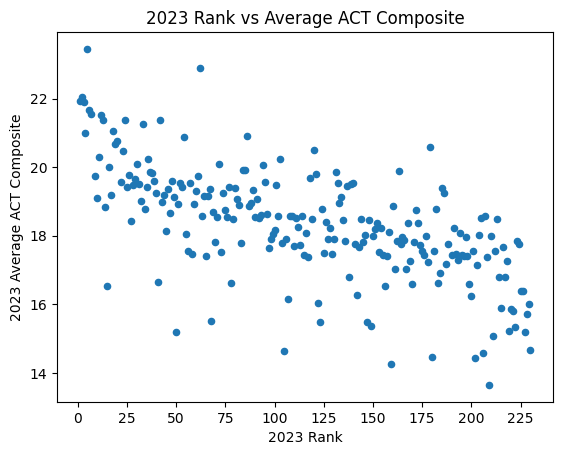

In [60]:
#plot RANK vs ACT Composite
AX1 = RANKED_BOTH.plot.scatter(x = '2223_RANK', y = '2223_ACT_COMP', xlabel = '2023 Rank', ylabel = '2023 Average ACT Composite')
AX1.xaxis.set_ticks(np.arange(0, 240, 25))
#AX1.axhline(y=0, color='k')
#AX1.axvline(x=0, color='k')
plt.title('2023 Rank vs Average ACT Composite')
plt.show()

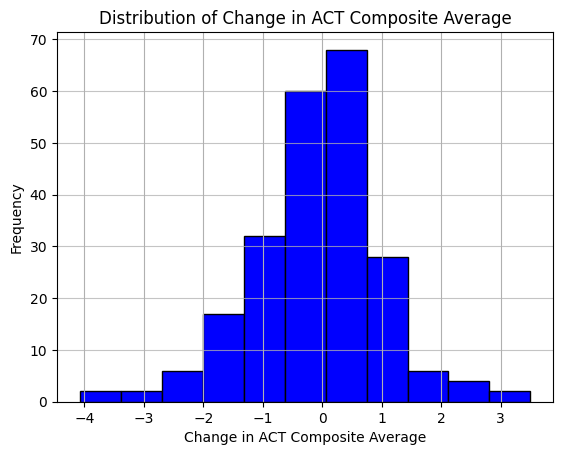

In [61]:
RANKED_BOTH['ACT_CHG'].plot.hist(grid=True, bins=11, rwidth=1.0,color='b',edgecolor='k')
plt.title('Distribution of Change in ACT Composite Average')
plt.xlabel('Change in ACT Composite Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)